In [33]:
import numpy as np
import matplotlib.pyplot as plt

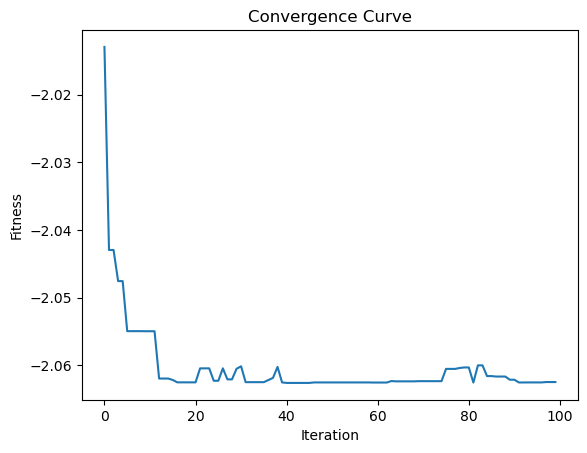

Best solution found: [-1.31533634 -1.3396781 ]
Objective value at best solution: -2.062469976678601


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class ABCSwarmOptimization:
    def __init__(self, colony_size, num_dimensions, num_iterations, objective_function, lower_bound, upper_bound):
        self.colony_size = colony_size  # Number of employed bees in the colony
        self.num_dimensions = num_dimensions  # Number of dimensions in the problem
        self.num_iterations = num_iterations  # Number of iterations or epochs
        self.objective_function = objective_function  # Objective function to be optimized
        self.lower_bound = lower_bound  # Lower bound for each dimension
        self.upper_bound = upper_bound  # Upper bound for each dimension
        self.best_solution = None  # Best solution found by the algorithm
        self.best_objective_values = []  # List to store corresponding objective values

    def initialize_colony(self):
        return np.random.uniform(low=self.lower_bound, high=self.upper_bound, size=(self.colony_size, self.num_dimensions))

    def clip_to_bounds(self, solution):
        return np.clip(solution, self.lower_bound, self.upper_bound)

    def employed_bees_phase(self, colony):
        for i in range(self.colony_size):
            partner_index = np.random.choice([idx for idx in range(self.colony_size) if idx != i])
            partner_solution = colony[partner_index]
            mutation_factor = np.random.uniform(low=-1, high=1, size=self.num_dimensions)
            new_solution = colony[i] + mutation_factor * (colony[i] - partner_solution)
            new_solution = self.clip_to_bounds(new_solution)
            new_solution_fitness = self.objective_function(new_solution)
            if new_solution_fitness < self.objective_function(colony[i]):
                colony[i] = new_solution
        return colony

    def calculate_probabilities(self, fitness_values):
        total_fitness = np.sum(fitness_values)
        probabilities = fitness_values / total_fitness
        return probabilities

    def onlooker_bees_phase(self, colony):
        fitness_values = np.array([self.objective_function(bee) for bee in colony])
        probabilities = self.calculate_probabilities(fitness_values)
        selected_indices = np.random.choice(range(self.colony_size), size=self.colony_size, p=probabilities)
        for i in range(self.colony_size):
            partner_index = np.random.choice([idx for idx in range(self.colony_size) if idx != selected_indices[i]])
            partner_solution = colony[partner_index]
            mutation_factor = np.random.uniform(low=-1, high=1, size=self.num_dimensions)
            new_solution = colony[selected_indices[i]] + mutation_factor * (colony[selected_indices[i]] - partner_solution)
            new_solution = self.clip_to_bounds(new_solution)
            new_solution_fitness = self.objective_function(new_solution)
            if new_solution_fitness < self.objective_function(colony[selected_indices[i]]):
                colony[selected_indices[i]] = new_solution
        return colony

    def scout_bees_phase(self, colony):
        for i in range(self.colony_size):
            if np.random.rand() < 0.1:  # Probability of abandoning a solution
                colony[i] = np.random.uniform(low=self.lower_bound, high=self.upper_bound, size=self.num_dimensions)
        return colony

    def optimize(self):
        colony = self.initialize_colony()
        for iteration in range(self.num_iterations):
            colony = self.employed_bees_phase(colony)
            colony = self.onlooker_bees_phase(colony)
            colony = self.scout_bees_phase(colony)
            best_solution_index = np.argmin([self.objective_function(bee) for bee in colony])
            self.best_solution = colony[best_solution_index]
            best_objective_value = self.objective_function(self.best_solution)
            self.best_objective_values.append(best_objective_value)
        plot=True
        if plot:
            plt.plot(self.best_objective_values)
            plt.title("Convergence Curve")
            plt.xlabel("Iteration")
            plt.ylabel("Fitness")
            plt.show()    
        return self.best_solution

# Define the objective function to be optimized
def crossit(xx):
    x1, x2 = xx
    
    fact1 = np.sin(x1) * np.sin(x2)
    fact2 = np.exp(np.abs(100 - np.sqrt(x1**2 + x2**2) / np.pi))
    
    y = -0.0001 * (np.abs(fact1 * fact2) + 1)**0.1
    
    return y

# Define the bounds for each dimension
lower_bound = -10
upper_bound = 10

# Initialize ABCSwarmOptimization
colony_size = 20
num_dimensions = 2  # Number of dimensions for the problem
num_iterations = 100
abc = ABCSwarmOptimization(colony_size, num_dimensions, num_iterations, crossit, lower_bound, upper_bound)

best_solution = abc.optimize()
print("Best solution found:", best_solution)
print("Objective value at best solution:", crossit(best_solution))
